In [2]:
from google.colab import files
files.upload()  # Upload kaggle.json here


Saving kaggle.json to kaggle.json


{'kaggle.json': b'{"username":"tharusha2001","key":"54909de5f310b6c834f2bcb2e0d15ff3"}'}

In [3]:
!mkdir -p ~/.kaggle
!cp kaggle.json ~/.kaggle/
!chmod 600 ~/.kaggle/kaggle.json


In [4]:
!kaggle datasets download -d sriramr/fruits-fresh-and-rotten-for-classification


Dataset URL: https://www.kaggle.com/datasets/sriramr/fruits-fresh-and-rotten-for-classification
License(s): unknown
100% 3.57G/3.58G [01:12<00:00, 338MB/s]
100% 3.58G/3.58G [01:12<00:00, 53.2MB/s]


In [5]:
!unzip -q fruits-fresh-and-rotten-for-classification.zip -d fruits_data


In [6]:
!ls fruits_data


dataset


In [7]:
import os
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout


In [8]:
train_path = 'fruits_data/dataset/train'
test_path = 'fruits_data/dataset/test'

# Rescale pixel values from [0, 255] → [0, 1]
train_gen = ImageDataGenerator(rescale=1./255)
test_gen = ImageDataGenerator(rescale=1./255)

train_data = train_gen.flow_from_directory(
    train_path,
    target_size=(100, 100),
    batch_size=32,
    class_mode='categorical'
)

test_data = test_gen.flow_from_directory(
    test_path,
    target_size=(100, 100),
    batch_size=32,
    class_mode='categorical'
)


Found 10901 images belonging to 6 classes.
Found 2698 images belonging to 6 classes.


In [9]:
model = Sequential([
    Conv2D(32, (3, 3), activation='relu', input_shape=(100, 100, 3)),
    MaxPooling2D(2, 2),

    Conv2D(64, (3, 3), activation='relu'),
    MaxPooling2D(2, 2),

    Conv2D(128, (3, 3), activation='relu'),
    MaxPooling2D(2, 2),

    Flatten(),
    Dense(128, activation='relu'),
    Dropout(0.5),
    Dense(train_data.num_classes, activation='softmax')
])

model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])
model.summary()


/usr/local/lib/python3.12/dist-packages/keras/src/layers/convolutional/base_conv.py:113: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                 │ (None, 98, 98, 32)     │           896 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d (MaxPooling2D)    │ (None, 49, 49, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_1 (Conv2D)               │ (None, 47, 47, 64)     │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_1 (MaxPooling2D)  │ (None, 23, 23, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_2 (Conv2D)               │ (None, 21, 21, 128)    │        73,856 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_2 (MaxPooling2D)  │ (None, 10, 10, 128)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten (Flatten)               │ (None, 12800)          │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 128)            │     1,638,528 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout (Dropout)               │ (None, 128)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 6)              │           774 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 1,732,550 (6.61 MB)

 Trainable params: 1,732,550 (6.61 MB)

 Non-trainable params: 0 (0.00 B)

In [10]:
history = model.fit(
    train_data,
    epochs=10,
    validation_data=test_data
)


/usr/local/lib/python3.12/dist-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


Epoch 1/10
341/341 ━━━━━━━━━━━━━━━━━━━━ 279s 809ms/step - accuracy: 0.6125 - loss: 0.9859 - val_accuracy: 0.8692 - val_loss: 0.3587
Epoch 2/10
341/341 ━━━━━━━━━━━━━━━━━━━━ 270s 790ms/step - accuracy: 0.8716 - loss: 0.3720 - val_accuracy: 0.9207 - val_loss: 0.2273
Epoch 3/10
341/341 ━━━━━━━━━━━━━━━━━━━━ 278s 816ms/step - accuracy: 0.8975 - loss: 0.2912 - val_accuracy: 0.9492 - val_loss: 0.1411
Epoch 4/10
341/341 ━━━━━━━━━━━━━━━━━━━━ 271s 796ms/step - accuracy: 0.9114 - loss: 0.2395 - val_accuracy: 0.9518 - val_loss: 0.1252
Epoch 5/10
341/341 ━━━━━━━━━━━━━━━━━━━━ 275s 806ms/step - accuracy: 0.9347 - loss: 0.1854 - val_accuracy: 0.9496 - val_loss: 0.1242
Epoch 6/10
341/341 ━━━━━━━━━━━━━━━━━━━━ 275s 805ms/step - accuracy: 0.9525 - loss: 0.1303 - val_accuracy: 0.9640 - val_loss: 0.0969
Epoch 7/10
341/341 ━━━━━━━━━━━━━━━━━━━━ 328s 823ms/step - accuracy: 0.9546 - loss: 0.1252 - val_accuracy: 0.9577 - val_loss: 0.1197
Epoch 8/10
341/341 ━━━━━━━━━━━━━━━━━━━━ 270s 792ms/step - accuracy: 0.9552 -

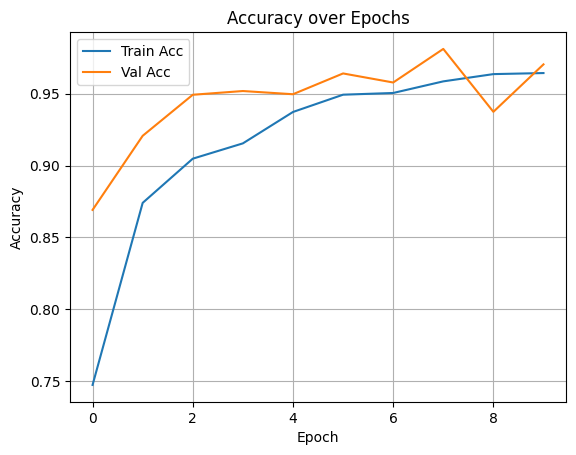

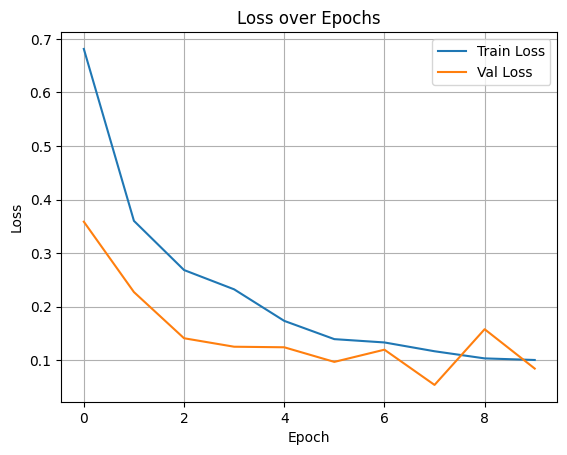

In [11]:
# Accuracy Plot
plt.plot(history.history['accuracy'], label='Train Acc')
plt.plot(history.history['val_accuracy'], label='Val Acc')
plt.title('Accuracy over Epochs')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()
plt.grid()
plt.show()

# Loss Plot
plt.plot(history.history['loss'], label='Train Loss')
plt.plot(history.history['val_loss'], label='Val Loss')
plt.title('Loss over Epochs')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()
plt.grid()
plt.show()


In [12]:
loss, acc = model.evaluate(test_data)
print(f"Test Accuracy: {acc * 100:.2f}%")


85/85 ━━━━━━━━━━━━━━━━━━━━ 25s 287ms/step - accuracy: 0.9681 - loss: 0.0915
Test Accuracy: 97.03%


In [13]:
model.save('custom_cnn_fruit_model.h5')
